In [2]:
import numpy as np
import h5py
import torch
import os
import matplotlib.pyplot as plt

Want to compare:
1. Centralized ML (ALL models: RNN, LSTM, LinRegr)
2. Sequential FL (ALL models: RNN< LSTM, LinRegr)

In [3]:
results_dir_path = "C:\\Users\\kdmen\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\DeepNetworks576\\"
results_dir_path

'C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\DeepNetworks576\\'

In [4]:
seq_res_lst = ["12-09_15-35_Seq_FedAvgLinRegr15_bs1", 
"12-09_15-47_Seq_FedAvgLinRegr10_bs1202", 
"12-09_15-48_Seq_FedAvgLinRegr10_bs32", 
"12-09_20-04_Seq_FedAvgRNN10_FirstDeepSeqWorking", 
"12-09_20-11_Seq_FedAvgRNN100_TestUnseenFlat", 
"12-09_20-21_Seq_FedAvgLinRegr100_TestUnseenBigGap", 
"12-09_20-28_Seq_FedAvgLinRegr100_su0_StillBigGap", 
"12-09_20-42_Seq_FedAvgLinRegr100_Used1500ParamsAndGapGone", 
"12-09_20-45_Seq_FedAvgLinRegr100_SwitchedToCond3NoChange", 
"12-09_20-57_Seq_FedAvgLinRegr100_1500ParamsBut_su1", 
"12-09_21-05_Seq_FedAvgLinRegr100_1500ParamsBut_su2", 
"12-09_22-18_Seq_FedAvgLinRegr1500_bs1202", 
"12-09_23-13_Seq_FedAvgRNN1500_bs1202_sl1_hs32_lr1", 
"12-10_10-28_Seq_FedAvgRNN1500_bs64_sl8_hs32_lr1", 
"12-10_11-22_Seq_FedAvgRNN1500_bs64_sl8_hs32_lrp1", 
"12-10_14-11_Seq_FedAvgLSTM500_bs64_hs32_sl8_lrp1", 
"12-10_14-32_Seq_FedAvgLSTM500_bs1200_hs32_sl1_lrp1"]

seq_filename = "FedAvg_test.h5"

In [28]:
cent_res_lst =["12-05_11-37_CentralizedRNN_Flat", 
"12-05_12-18_CentralizedRNN_25rounds", 
"12-05_12-27_CentralizedLSTM5", 
"12-05_13-30_CentralizedRNN50_bs1_sl100", 
"12-05_14-09_CentralizedLSTM25_bs1_sl100", 
"12-05_15-22_CentralizedLinRegr25_nohypers", 
"12-07_11-52_CentralizedRNN10_hs24_LRp5_bs32_sl100", 
"12-07_11-54_CentralizedRNN10_hs10_LRp5_bs32_sl100", 
"12-07_13-05_CentralizedRNN10_hs64_LRp5_bs32_sl100", 
"12-07_13-09_CentralizedRNN10_hs88_LRp5_bs32_sl100", 
"12-07_13-15_CentralizedRNN10_hs128_LRp5_bs32_sl100", 
"12-07_13-22_CentralizedRNN10_hs180_LRp5_bs32_sl100", 
"12-07_13-34_CentralizedRNN10_hs256_LRp5_bs32_sl100", 
"12-07_14-12_CentralizedRNN10_hs128_LR1_bs32_sl100", 
"12-07_14-42_CentralizedLinRegr10_LRp1_bs32_sl100", 
"12-07_14-45_CentralizedLSTM10_hs128_LRp5_bs32_sl100", 
"12-07_15-10_CentralizedLSTM10_hs16_LRp5_bs32_sl100", 
"12-07_15-13_CentralizedLSTM10_hs64_LRp5_bs32_sl100"]

cent_filename = "Centralized_test.h5"

## Sequential

In [6]:
full_file_name = results_dir_path + seq_res_lst[0] + "\\" + seq_filename
with h5py.File(full_file_name, 'r') as fs:
    a_group_key = list(fs.keys())
    print(f"{a_group_key}\n")
    
    #train_losses_log[file_idx] = fs['rs_train_loss'][()]
    #test_losses_log[file_idx]  = fs['rs_test_loss'][()]
    
    print(f"fs['rs_train_loss'][0]: {fs['rs_train_loss'][-1]}")
    print(f"fs['rs_test_loss'][0]: {fs['rs_test_loss'][-1]}")
    print(f"fs['curr_live_rs_test_loss'][0]: {fs['curr_live_rs_test_loss'][-1]}")
    print(f"fs['prev_live_rs_test_loss'][0]: {fs['prev_live_rs_test_loss'][-1]}")
    print(f"fs['unseen_live_rs_test_loss'][0]: {fs['unseen_live_rs_test_loss'][-1]}")
    #print(f"fs['rs_train_loss'][0]: {fs['rs_train_loss'][-1]}")

print("\nComplete")

['client_testing_logs', 'cost_func_tuples_by_client', 'curr_live_rs_test_loss', 'gradient_norm_lists_by_client', 'prev_live_rs_test_loss', 'rs_test_loss', 'rs_train_loss', 'unseen_live_rs_test_loss']

fs['rs_train_loss'][0]: 3.2588475738478187e-10
fs['rs_test_loss'][0]: 1.0437074160436168
fs['curr_live_rs_test_loss'][0]: 9.879956431430546e-11
fs['prev_live_rs_test_loss'][0]: 0.00025664495002238513
fs['unseen_live_rs_test_loss'][0]: 1.0437074160436168

Complete


In [10]:
for file in seq_res_lst:
    full_file_name = results_dir_path + file + "\\" + seq_filename
    with h5py.File(full_file_name, 'r') as fs:        
        #train_losses_log[file_idx] = fs['rs_train_loss'][()]
        #test_losses_log[file_idx]  = fs['rs_test_loss'][()]

        print(file)
        print(f"fs['rs_train_loss'][0]: {fs['rs_train_loss'][-1]:.5f}")
        print(f"fs['rs_test_loss'][0]: {fs['rs_test_loss'][-1]:.5f}")
        #print(f"fs['curr_live_rs_test_loss'][0]: {fs['curr_live_rs_test_loss'][-1]}")
        #print(f"fs['prev_live_rs_test_loss'][0]: {fs['prev_live_rs_test_loss'][-1]}")
        #print(f"fs['unseen_live_rs_test_loss'][0]: {fs['unseen_live_rs_test_loss'][-1]}")
        print()

print("\nComplete")

12-09_15-35_Seq_FedAvgLinRegr15_bs1
fs['rs_train_loss'][0]: 0.00000
fs['rs_test_loss'][0]: 1.04371

12-09_15-47_Seq_FedAvgLinRegr10_bs1202
fs['rs_train_loss'][0]: 0.00148
fs['rs_test_loss'][0]: 0.00140

12-09_15-48_Seq_FedAvgLinRegr10_bs32
fs['rs_train_loss'][0]: 0.01742
fs['rs_test_loss'][0]: 0.03434

12-09_20-04_Seq_FedAvgRNN10_FirstDeepSeqWorking
fs['rs_train_loss'][0]: 0.20007
fs['rs_test_loss'][0]: 0.29748

12-09_20-11_Seq_FedAvgRNN100_TestUnseenFlat
fs['rs_train_loss'][0]: 0.00502
fs['rs_test_loss'][0]: 3.56323

12-09_20-21_Seq_FedAvgLinRegr100_TestUnseenBigGap
fs['rs_train_loss'][0]: 0.00031
fs['rs_test_loss'][0]: 0.03253

12-09_20-28_Seq_FedAvgLinRegr100_su0_StillBigGap
fs['rs_train_loss'][0]: 0.00032
fs['rs_test_loss'][0]: 0.08335

12-09_20-42_Seq_FedAvgLinRegr100_Used1500ParamsAndGapGone
fs['rs_train_loss'][0]: 0.00035
fs['rs_test_loss'][0]: 0.00087

12-09_20-45_Seq_FedAvgLinRegr100_SwitchedToCond3NoChange
fs['rs_train_loss'][0]: 0.00030
fs['rs_test_loss'][0]: 0.00080

12-09_

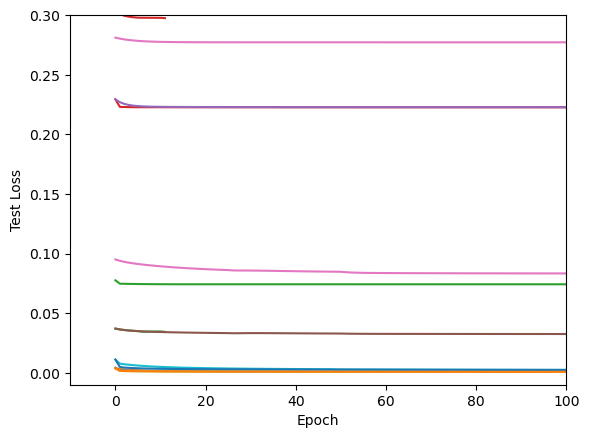


Complete


In [22]:
for file in seq_res_lst:
    full_file_name = results_dir_path + file + "\\" + seq_filename
    with h5py.File(full_file_name, 'r') as fs:
        plt.plot(range(len(fs['rs_test_loss'][()])), fs['rs_test_loss'][()], label=file)
#plt.legend()
#plt.title()
plt.ylabel("Test Loss")
plt.xlabel("Epoch")
plt.ylim(-0.01, 0.3)
plt.xlim(-10, 100)
plt.show()
print("\nComplete")

## Centralized

In [29]:
for file in cent_res_lst:
    full_file_name = results_dir_path + file + "\\" + cent_filename
    with h5py.File(full_file_name, 'r') as fs:        
        #train_losses_log[file_idx] = fs['rs_train_loss'][()]
        #test_losses_log[file_idx]  = fs['rs_test_loss'][()]

        print(file)
        print(f"fs['rs_train_loss'][0]: {fs['rs_train_loss'][-1]:.5f}")
        print(f"fs['rs_test_loss'][0]: {fs['rs_test_loss'][-1]:.5f}")
        #print(f"fs['curr_live_rs_test_loss'][0]: {fs['curr_live_rs_test_loss'][-1]}")
        #print(f"fs['prev_live_rs_test_loss'][0]: {fs['prev_live_rs_test_loss'][-1]}")
        #print(f"fs['unseen_live_rs_test_loss'][0]: {fs['unseen_live_rs_test_loss'][-1]}")
        print()

print("\nComplete")

12-05_11-37_CentralizedRNN_Flat
fs['rs_train_loss'][0]: 1.83367
fs['rs_test_loss'][0]: 0.39247

12-05_12-18_CentralizedRNN_25rounds
fs['rs_train_loss'][0]: 0.68818
fs['rs_test_loss'][0]: 0.14499

12-05_12-27_CentralizedLSTM5
fs['rs_train_loss'][0]: 3.62932
fs['rs_test_loss'][0]: 0.76507

12-05_13-30_CentralizedRNN50_bs1_sl100
fs['rs_train_loss'][0]: 0.00000
fs['rs_test_loss'][0]: 0.00000

12-05_14-09_CentralizedLSTM25_bs1_sl100
fs['rs_train_loss'][0]: 0.00000
fs['rs_test_loss'][0]: 0.00000

12-05_15-22_CentralizedLinRegr25_nohypers
fs['rs_train_loss'][0]: 0.00000
fs['rs_test_loss'][0]: 0.00000

12-07_11-52_CentralizedRNN10_hs24_LRp5_bs32_sl100
fs['rs_train_loss'][0]: 0.29971
fs['rs_test_loss'][0]: 0.06649

12-07_11-54_CentralizedRNN10_hs10_LRp5_bs32_sl100
fs['rs_train_loss'][0]: 0.35887
fs['rs_test_loss'][0]: 0.08334

12-07_13-05_CentralizedRNN10_hs64_LRp5_bs32_sl100
fs['rs_train_loss'][0]: 0.45772
fs['rs_test_loss'][0]: 0.09222

12-07_13-09_CentralizedRNN10_hs88_LRp5_bs32_sl100
fs['rs

> Best Results
> 
12-05_13-30_CentralizedRNN50_bs1_sl100 (0.00000)
12-05_14-09_CentralizedLSTM25_bs1_sl100 (0.00000)


12-05_15-22_CentralizedLinRegr25_nohy (0.00000)
0000

12-07_11-52_CentralizedRNN10_hs24_LRp5_bs (0.06649)
12-07_14-12_CentralizedRNN10_hs128_LR1_bs32_sl100 (0.02389)


12-07_14-42_CentralizedLinRegr10_LRp1_bs32_s (0.01722).01722]: 0.0664900

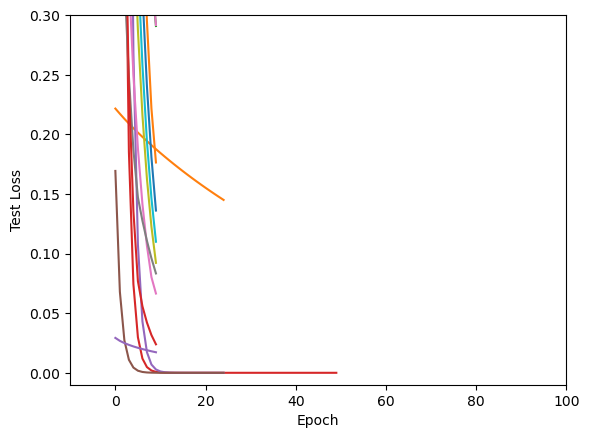


Complete


In [30]:
for file in cent_res_lst:
    full_file_name = results_dir_path + file + "\\" + cent_filename
    with h5py.File(full_file_name, 'r') as fs:
        plt.plot(range(len(fs['rs_test_loss'][()])), fs['rs_test_loss'][()], label=file)
#plt.legend()
#plt.title()
plt.ylabel("Test Loss")
plt.xlabel("Epoch")
plt.ylim(-0.01, 0.3)
plt.xlim(-10, 100)
plt.show()
print("\nComplete")

## Final Results

In [38]:

#mdHM_12-10_21-21_FedAvg # Seq LinearRegression
#mdHM_12-10_21-23_FedAvg # Lots of overfitting
#mdHM_12-10_22-03_FedAvg # Little overfitting
#mdHM_12-10_22-07_FedAvg # Slightly worse version of the above
#mdHM_12-10_22-14_Centralized # Test better than train lol
#mdHM_12-10_22-40_Centralized # Another test better than train lol
#mdHM_12-10_22-59_Centralized # Worse version of 22-40

final_res_lst =["mdHM_12-10_21-21_FedAvg", 
"mdHM_12-10_21-23_FedAvg", 
"mdHM_12-10_22-03_FedAvg", 
"mdHM_12-10_22-07_FedAvg", 
"mdHM_12-10_22-14_Centralized", 
"mdHM_12-10_22-40_Centralized", 
"mdHM_12-10_22-59_Centralized"]

In [39]:
dir_path_str = r"C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Personalized_Federated_Learning\results\DeepNetworks576\FinalRes"
dir_path_str

'C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Personalized_Federated_Learning\\results\\DeepNetworks576\\FinalRes'

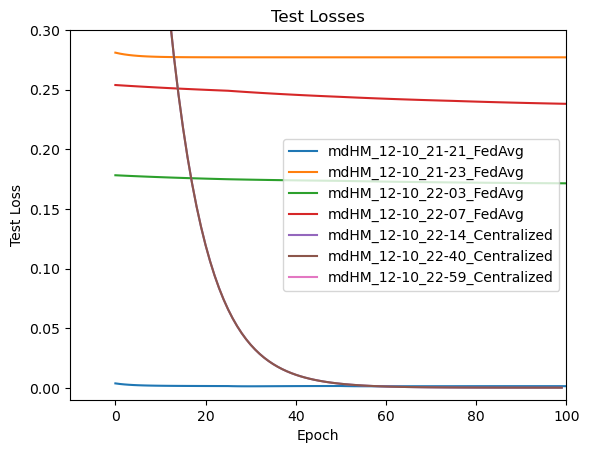


Complete


In [42]:
for idx, file in enumerate(final_res_lst):
    if idx<4:
        full_file_name = dir_path_str + "\\" + file + "\\" + seq_filename
    else:
        full_file_name = dir_path_str + "\\" + file + "\\" + cent_filename
    with h5py.File(full_file_name, 'r') as fs:
        plt.plot(range(len(fs['rs_test_loss'][()])), fs['rs_test_loss'][()], label=file)
plt.legend()
plt.title("Test Losses")
plt.ylabel("Test Loss")
plt.xlabel("Epoch")
plt.ylim(-0.01, 0.3)
plt.xlim(-10, 100)
plt.show()
print("\nComplete")

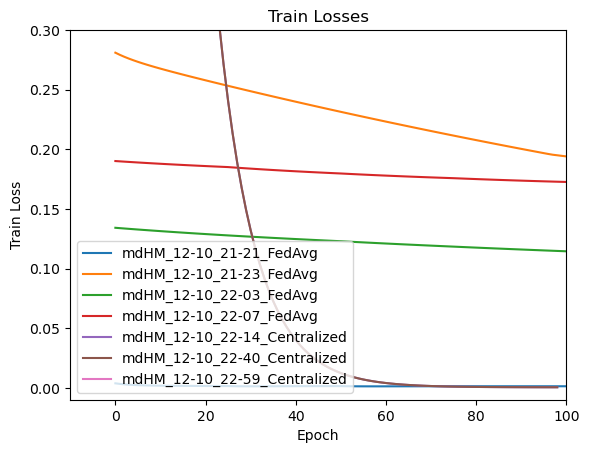


Complete


In [43]:
for idx, file in enumerate(final_res_lst):
    if idx<4:
        full_file_name = dir_path_str + "\\" + file + "\\" + seq_filename
    else:
        full_file_name = dir_path_str + "\\" + file + "\\" + cent_filename
    with h5py.File(full_file_name, 'r') as fs:
        plt.plot(range(len(fs['rs_train_loss'][()])), fs['rs_train_loss'][()], label=file)
plt.legend()
plt.title("Train Losses")
plt.ylabel("Train Loss")
plt.xlabel("Epoch")
plt.ylim(-0.01, 0.3)
plt.xlim(-10, 100)
plt.show()
print("\nComplete")

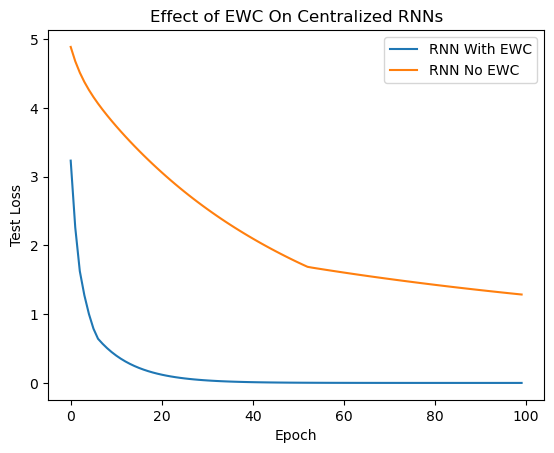

In [49]:
with h5py.File(dir_path_str + "\\mdHM_12-10_22-14_Centralized\\" + cent_filename, 'r') as fs:
    plt.plot(range(len(fs['rs_test_loss'][()])), fs['rs_test_loss'][()], label="RNN With EWC")
with h5py.File(dir_path_str + "\\mdHM_12-10_22-59_Centralized\\" + cent_filename, 'r') as fs:
    plt.plot(range(len(fs['rs_test_loss'][()])), fs['rs_test_loss'][()], label="RNN No EWC")
plt.title("Effect of EWC On Centralized RNNs")
plt.ylabel("Test Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()